## Sieci interakcji postaci w serialu HBO „Gra o tron”
Pary postaci są połączone (nieukierunkowanymi) krawędziami ważonymi liczbą interakcji.

Istnieje pięć rodzajów interakcji. Postać A i Postać B są połączone, gdy:

1. Postać A mówi bezpośrednio po Postać B
2. Postać A mówi o postaci B
3. Postać C mówi o postaci A i postaci B
4. Postać A i postać B są wymienione w tym samym kierunku scenicznym
5. Postać A i postać B pojawiają się razem w scenie


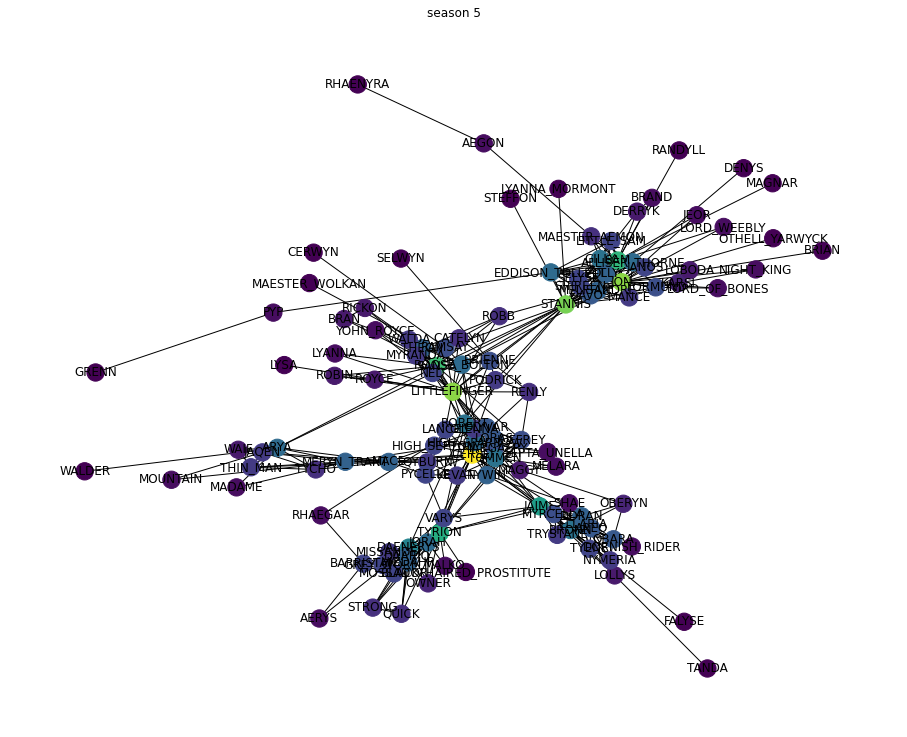

In [1]:
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt
from pyvis.network import Network

seasons=[]
people=[]
all_people=[]
files=[]

filename ="got-s5-edges.csv"
files.append(filename)
lines = [line.split(':') for line in open(filename,'r', encoding='utf-8')]
for line in lines:
    key = line[0].strip().split(',')
    seasons.append((key[0],key[1],key[2]))
    if key[0] not in people:
        people.append(key[0])
    if key[1] not in people:
         people.append(key[1])
    if key[0] not in all_people:
        all_people.append(key[0])
    if key[1] not in all_people:
            all_people.append(key[1])
people.remove('Source')
people.remove('Target')
all_people.remove('Source')
all_people.remove('Target')
seasons.remove(('Source', 'Target', 'Weight'))
plt.figure(figsize=(16,13)) 
plt.title("season 5")
G=nx.Graph()
G.add_nodes_from(people)
G.add_weighted_edges_from(seasons)
dcent = nx.degree_centrality(G)
pos = nx.spring_layout(G)
dcent_color = [i for i in dcent.values()]
nx.draw(G, with_labels=True, pos=pos, node_color=dcent_color)


In [2]:

#dfs = [pd.read_csv(f) for f in files]

# All seasons dataframe
# df = pd.concat(dfs, ignore_index=True)
df=pd.read_csv('got-s5-edges.csv')
#df=pd.read_csv('all.csv', delimiter=";")
df.head()

,Source,Target,Weight,Season
0,ARYA,JAQEN,148,5
1,JORAH,TYRION,141,5
2,BRONN,JAIME,121,5
3,TYRION,VARYS,110,5
4,DAENERYS,TYRION,98,5


In [3]:
df.tail()

,Source,Target,Weight,Season
392,THIN_MAN,WAIF,2,5
393,TOMMEN,TYWIN,2,5
394,TYCHO,JAQEN,2,5
395,TYCHO,MERYN_TRANT,2,5
396,TYCHO,THIN_MAN,2,5


In [4]:
all_got=nx.from_pandas_edgelist(df,source='Source',target='Target', edge_attr=['Weight'])

In [5]:
plt.figure(figsize=(100,100))
pos = nx.spring_layout(all_got)
nx.draw(all_got, with_labels=True, pos=pos)
net = Network('100%', '100%',bgcolor="#222222", font_color="white")
net.from_nx(all_got)
net.show("all_seasons.html")

## Miary centralności
1. **Betweenness centrality** 

a) Centralność pośrednia dla każdego wierzchołka to liczba tych najkrótszych ścieżek, które przechodzą przez wierzchołek. 

b) Węzeł o większej centralności między połączeniami ma większą kontrolę nad siecią, ponieważ przez ten węzeł przechodzi więcej informacji.

2. **Closeness centrality**

a) Centralność bliskości węzła mierzy jego średnią odległość (odległość odwrotna) do wszystkich innych węzłów. Węzły o wysokim wyniku bliskości mają najkrótsze odległości do wszystkich innych węzłów.

b) Centralność bliskości to sposób wykrywania węzłów, które są w stanie bardzo wydajnie rozpowszechniać informacje za pośrednictwem grafu.

3. **Eigenvector centrality**

a) W teorii grafów centralność wektora własnego jest miarą wpływu węzła w sieci . Względne oceny są przypisywane wszystkim węzłom w sieci w oparciu o koncepcję, że połączenia z węzłami o wysokiej punktacji mają większy wpływ na ocenę danego węzła niż równe połączenia z węzłami o niskiej punktacji. Wysoki wynik wektora własnego oznacza, że węzeł jest połączony z wieloma węzłami, które same mają wysokie wyniki.

4. **Degree centrality**

a) Stopień węzła to liczba powiązań społecznych (tj. krawędzi), jakie ma.
Centralność stopnia dla węzła to po prostu jego stopień odzwierciedlony w skali 0-1, gdzie 1 ma przypisany węzeł o najwyższym stopniu.

In [6]:
nodes =pd.DataFrame(all_people)
nodes.columns=['people']

In [7]:
nodes.head()

,people
0,ARYA
1,JAQEN
2,JORAH
3,TYRION
4,BRONN


In [8]:
bet_cen = nx.betweenness_centrality(all_got)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen = df_bet_cen.reset_index()
df_bet_cen.columns=['people', 'betweenness_centrality']

In [9]:
clo_cen = nx.closeness_centrality(all_got)
df_clo_cen = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo_cen = df_clo_cen.reset_index()
df_clo_cen.columns=['people', 'closeness_centrality']

In [10]:
eig_cen = nx.eigenvector_centrality(all_got)
df_eig_cen = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig_cen = df_eig_cen.reset_index()
df_eig_cen.columns=['people', 'eigenvector_centrality']

In [11]:
deg_cen = nx.degree_centrality(all_got)
df_deg_cen = pd.DataFrame.from_dict(deg_cen, orient='index')
df_deg_cen = df_deg_cen.reset_index()
df_deg_cen.columns=['people', 'degree_centrality']

In [12]:
analyse= pd.merge(nodes,df_bet_cen, on = ['people'])
analyse = pd.merge(analyse,df_clo_cen, on = ['people'])
analyse = pd.merge(analyse,df_eig_cen, on = ['people'])
analyse = pd.merge(analyse,df_deg_cen, on = ['people'])
analyse.head()

,people,betweenness_centrality,closeness_centrality,eigenvector_centrality,degree_centrality
0,ARYA,0.072863,0.335227,0.044908,0.093220
1,JAQEN,0.001921,0.282297,0.018638,0.050847
2,JORAH,0.023791,0.340058,0.062464,0.093220
3,TYRION,0.126352,0.388158,0.104275,0.161017
4,BRONN,0.031275,0.335227,0.070410,0.101695


## Wykrywanie społeczności

**greedy_modularity_communities()**

Ta funkcja wykorzystuje **zachłanną maksymalizację modularności Clauseta-Newmana-Moore'a**, aby znaleźć partycję społeczności o największej modułowości.

Maksymalizacja zachłannej modułowości rozpoczyna się od każdego węzła w jego własnej społeczności i wielokrotnie łączy parę społeczności, które prowadzą do największej modułowości, aż dalsze zwiększenie modułowości nie jest możliwe (maksimum). 

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities


import random
#communities = girvan_newman(all_got)
communities = greedy_modularity_communities(all_got)


node_groups = []
#for com in next(communities):
for com in communities:
    node_groups.append(list(com))

print(len(node_groups))

color_map = {}
color_scale=[]

for i in range(len(node_groups)):
    color = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    color_scale.append(color)
    
for node in all_got:
    color_map[node]=[]
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map[node]=color_scale[i]

com = pd.DataFrame.from_dict(color_map, orient='index')
com = com.reset_index()
com.columns=['people', 'community_color']
print(com)
analyse = pd.merge(analyse,com, on = ['people'])
analyse.head()

5
             people community_color
0              ARYA         #2DFE00
1             JAQEN         #2DFE00
2             JORAH         #FB7AB9
3            TYRION         #FB7AB9
4             BRONN         #A7E1A9
..              ...             ...
114  LYANNA_MORMONT         #059961
115  MAESTER_WOLKAN         #30905E
116          MAGNAR         #059961
117         RANDYLL         #059961
118         STEFFON         #059961

[119 rows x 2 columns]


,people,betweenness_centrality,closeness_centrality,eigenvector_centrality,degree_centrality,community_color
0,ARYA,0.072863,0.335227,0.044908,0.093220,#2DFE00
1,JAQEN,0.001921,0.282297,0.018638,0.050847,#2DFE00
2,JORAH,0.023791,0.340058,0.062464,0.093220,#FB7AB9
3,TYRION,0.126352,0.388158,0.104275,0.161017,#FB7AB9
4,BRONN,0.031275,0.335227,0.070410,0.101695,#A7E1A9


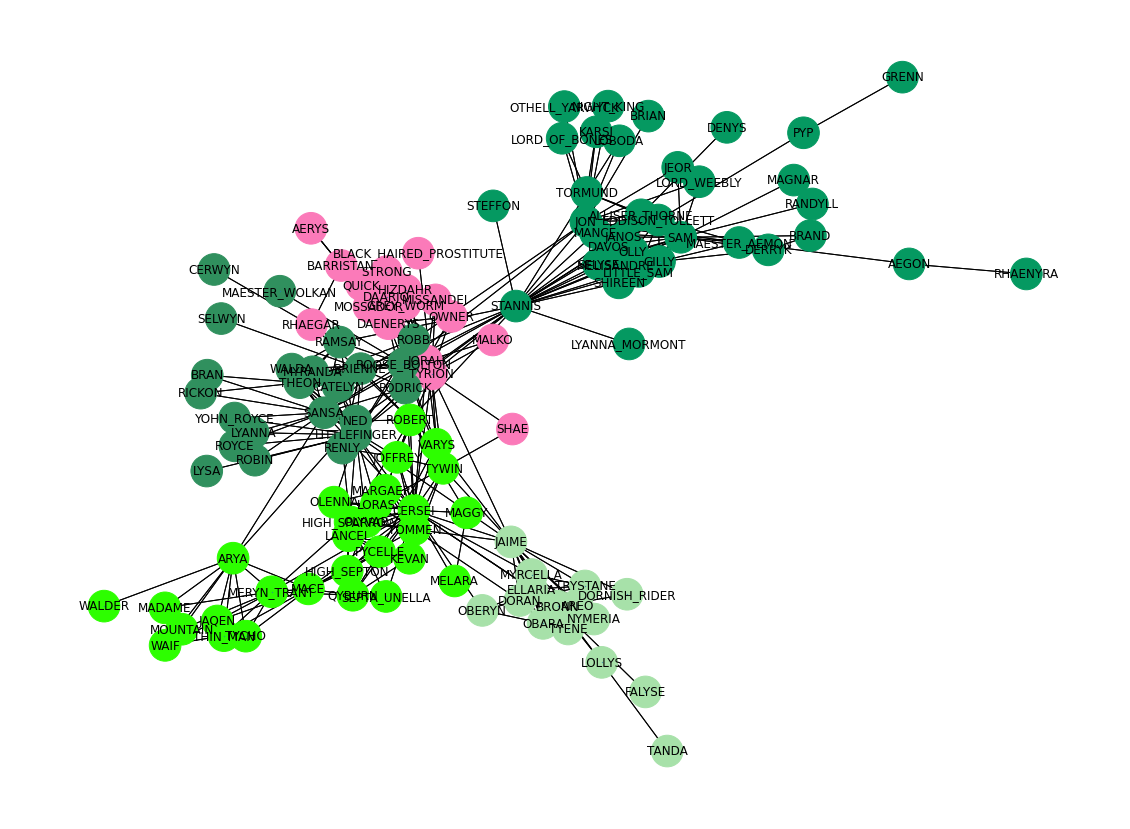

In [14]:
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(all_got, pos, nodelist=analyse['people'], node_color=analyse['community_color'],node_size=1000)
nx.draw_networkx_edges(all_got, pos=pos)
nx.draw(all_got, with_labels=True, pos=pos, node_size=0.1)


In [15]:
analyse.to_csv('s5.csv')